# Prediction Using Unsupervised ML

### Sparks Foundation

## Task 2: Unsupervised ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

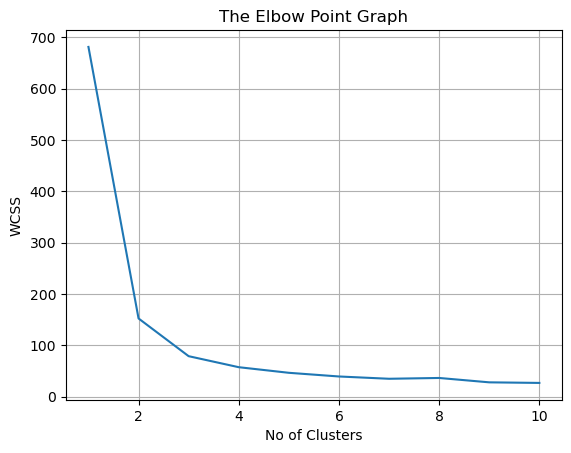

In [5]:
# Now will plot the elbow graph to select optimal value of cluster

plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### We are selecting a cluster value of 3 because the elbow curve shows minimal variation beyond this point, indicating that additional clusters do not significantly improve the clustering effectiveness.

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


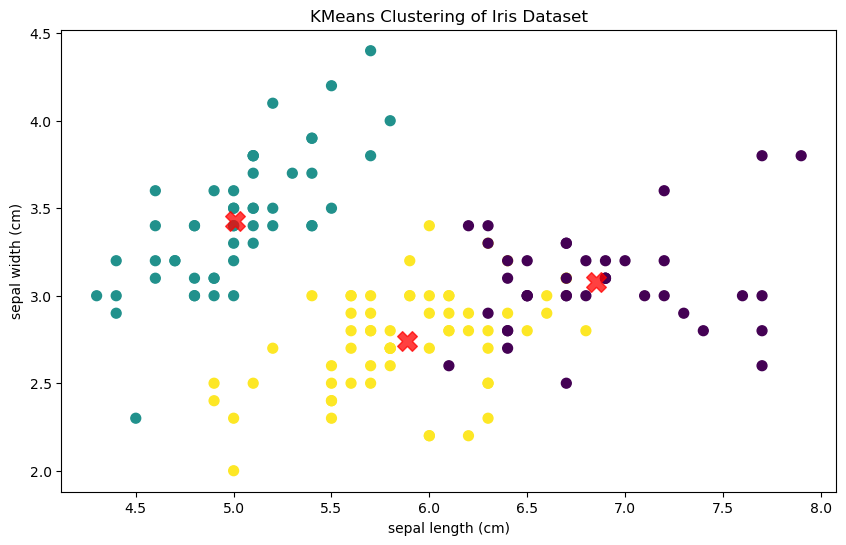

In [7]:
# Visualising the clusters - On the first two columns
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

# Add the cluster assignments to the DataFrame
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot using the first two features (sepal length and sepal width)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

###  Here are the three clusters that have been formed based on the data and the clustering algorithm used.